# Support Vector Machine Classifier for Sentiment Analysis of Conversations

In [16]:
from scipy.io.wavfile import read, write
import librosa

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

from Audio_Preprocess import *

In [2]:
# Import data
npz = np.load('Sentiment_analysis_data.npz')
x = npz['inputs']
y = npz['targets']

In [3]:
# Standarise data
scaled_x = preprocessing.scale(x)

In [4]:
# Shuffle data
n = x.shape[0]
shuffled_indices = np.arange(n)
np.random.shuffle(shuffled_indices)

shuffled_x = scaled_x[shuffled_indices]
shuffled_y = y[shuffled_indices]

In [5]:
# Merge inputs and targets
data = add_label_arrays(shuffled_x, np.expand_dims(shuffled_y, axis=1))

In [6]:
# Create dataframe from numpy arrays
columns = [ 'c' + str(i) for i in range(28) ] + [ 'label' ]
df = pd.DataFrame(data=data, columns=columns)
df.head(5)

,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,...,c19,c20,c21,c22,c23,c24,c25,c26,c27,label
0,0.32072879406190613,-1.0263749954430366,0.7567518851183276,-1.0542719619746872,-0.5815367082161955,-0.09054446600061244,-0.11445370900539575,0.4464874549051985,0.7358584453610909,0.07771850651951613,...,0.2879091543370874,-1.5493180862063334,-0.15788606130945496,0.5471752066833696,-1.175534599007752,-0.9048604451867792,0.621564174236437,1.417309324236045,0.4809566857112128,happy
1,0.6594402196655799,0.24031742372175055,-1.5277246739404864,0.7774693499386174,-0.6291798105453122,0.6415747813915204,-0.19440137439544694,0.7892307167763061,-0.9336692750247153,-0.010945344577513016,...,0.2920515369764563,0.6658830304196417,1.0530175682559997,1.1140801631298103,-0.1881269992115197,0.052099559439818574,-0.0693177821757523,0.8999714644899497,0.5737228442997263,surprise
2,0.20937214458712505,-0.3641375208286378,-0.6612014479954438,0.6964967293675428,-2.2859324312078213,1.8456723523106793,-1.826990604996516,-0.49821800373989994,0.8215197024201131,-1.2511887372218273,...,-0.8835591026215293,-0.2829453599373765,0.3661363760276953,-1.8637351572624115,-1.0041660206300473,-0.8782056787987305,0.6158962046447305,1.1577789169250503,0.5900629110858302,surprise
3,0.52599831997946,-0.12804219156244573,-0.14685157099088647,0.19295859393345952,-1.0429067267553467,1.5978098884877348,-1.2953564834869749,-0.4149992211434744,0.2062411907457589,-1.2325154382292496,...,-1.5379307293595572,-1.332159769214242,-1.0533326576110094,-0.5312318198222811,-0.3680435785276729,1.6352667467588007,0.7972001479731627,1.1578692738945455,0.13752933595038316,surprise
4,-0.5531292927541207,-0.6228674669523857,-0.17290175933375657,-1.5948555111190945,1.6736509958832442,-0.7587061246295272,0.5012573335777337,1.151325684201674,-1.1307791773792308,-1.5778237133814033,...,1.2215734642393308,0.5003040960505633,1.1543028873688632,-0.6152189999831955,0.1736727589714408,-0.10933612765320183,-0.78662285871362,-0.3680493638564748,-1.3709914336810212,angry


In [7]:
# Create training and testing sets
X = df.iloc[:,:-1]
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25)
print(X_train.shape, y_train.shape)

(2089, 28) (2089,)


In [11]:
# Define Support Vector Machine model and predict label
svm = SVC(gamma='auto', probability=True)
svm.fit(X, y)
y_test_pred = svm.predict(X_test)

In [12]:
# Get probability of prediction
y_test_prob = svm.predict_proba(X_test)

In [14]:
# Get score of prediction
svm.score(X_test, y_test)

0.994261119081779

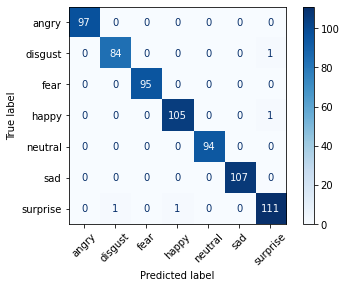

In [17]:
disp = plot_confusion_matrix(svm, X_test, y_test,
                             cmap=plt.cm.Blues,
                             xticks_rotation=45)